<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- 다양한 알고리즘 모델 성능을 K-Fold CV로 검증합니다.
- 성능이 좋을 것으로 확인된 모델을 GridSearchCV를 사용해 최적화합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')

In [2]:
# 데이터 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/airline_satisfaction_small.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [ ]:
# 데이터 살펴보기
data.head()

**데이터 정보**

- id : 탑승자 고유 아이디
- gender: 성별 (Female, Male)
- customer_type: 고객 유형 (Loyal customer, disloyal customer)
- age: 탑승자 나이
- type_of_travel: 비행 목적(Personal Travel, Business Travel)
- class: 등급 (Business, Eco, Eco Plus)
- flight_distance: 비행 거리
- inflight_wifi_service: 와이파이 서비스 만족도 (0:N/A; 1-5)
- departure/arrival_time_convenient: 출발, 도착 시간 만족도 (0:N/A; 1-5)
- ease_of_online_booking: 온라인 부킹 만족도 (0:N/A; 1-5)
- gate_location: 게이트 위치 만족도 (0:N/A; 1-5)
- food_and_drink: 식사와 음료 만족도 (0:N/A; 1-5)
- online_boarding: 온라인 보딩 만족도 (0:N/A; 1-5)
- seat_comfort: 좌석 편안함 만족도 (0:N/A; 1-5)
- inflight_entertainment: 기내 엔터테인먼트 만족도 (0:N/A; 1-5)
- on-board_service: 온 보드 서비스 만족도 (0:N/A; 1-5)
- leg_room_service: 다리 공간 만족도 (0:N/A; 1-5)
- baggage_handling: 수하물 처리 만족도 (0:N/A; 1-5)
- check-in_service: 체크인 서비스 만족도 (0:N/A; 1-5)
- inflight_service: 기내 서비스 만족도 (0:N/A; 1-5)
- cleanliness: 청결 만족도 (0:N/A; 1-5)
- departure_delay_in_minutes: 출발 지연 시간(분)
- arrival_delay_in_minutes: 도착 지연 시간(분)
- satisfaction: 항공 만족도(1: Satisfaction, 0: Neutral or Dissatisfaction) - Target

In [ ]:
# 열 정보 확인
data.info()

In [ ]:
# 기초통계정보 확인
data.describe()

In [ ]:
# 결측치 확인
data.isna().sum()

In [ ]:
# 범주값 개수 확인
print('=' * 35)
print(data['gender'].value_counts())
print('-' * 35)
print(data['customer_type'].value_counts())
print('-' * 35)
print(data['type_of_travel'].value_counts())
print('-' * 35)
print(data['class'].value_counts())
print('-' * 35)
print(data['satisfaction'].value_counts())
print('=' * 35)

In [ ]:
# satisfaction 값 분포
sns.countplot(data['satisfaction'])
plt.show()

In [ ]:
# type_of_travel 값 분포
sns.countplot(data['type_of_travel'])
plt.show()

In [ ]:
# age 값 분포
sns.histplot(data['age'], bins=30)
plt.show()

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 불필요한 변수 제거**

In [3]:
# id 변수 제거
col_x = ['id', 'departure/arrival_time_convenient', 'gate_location', 'departure_delay_in_minutes']


# 확인
data.head()

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


**2) 결측치 처리**

In [52]:
# 결측치 제거
data.dropna(axis=0,inplace=True)

# 확인
data.isnull().sum()

id                                   0
age                                  0
flight_distance                      0
inflight_wifi_service                0
departure/arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
on-board_service                     0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
gender_Male                          0
customer_type_disloyal Customer      0
type_of_travel_Personal Travel       0
class_Eco                            0
class_Eco Plus                       0
dtype: int64

**3) 가변수화**

In [53]:
# 가변수화
cols = ['gender', 'customer_type', 'type_of_travel', 'class']
data = pd.get_dummies(data = data, columns=cols, drop_first=True)

# 확인
data.head()

KeyError: "None of [Index(['gender', 'customer_type', 'type_of_travel', 'class'], dtype='object')] are in the [columns]"

**4) x, y 분리**

In [54]:
# target 확인
target = 'satisfaction'
# 데이터 분리
x = data.drop(target, axis = 1)
y = data[target]

**5) 정규화**

In [55]:
# 정규화
x = (x - x.min()) / (x.max() - x.min())

**6) 학습용, 평가용 데이터 분리**

In [56]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

# 4.모델 검증

- 여러 알고리즘 모델 성능을 K-Fold CV로 성능을 검증합니다.
- 하이퍼파라미터를 설정하지 않고 진행합니다.
- 각 모델의 성능 정보를 수집해 마지막에 비교합니다.
- 우선 사용할 라이브러리를 모두 불러옵니다.

In [57]:
# 사용할 알고리즘
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
# 성능 검증용


# 성능 평가용


## 4.1.KNN

- KNN 알고리즘 모델 성능을  K-Fold CV로 검증합니다.

In [58]:
# 선언하기
model = KNeighborsClassifier()

In [59]:
# 성능검증
cv_score = cross_val_score(model, x_train, y_train, cv=10)

In [60]:
# 결과수집
result = {}
result['KNN'] = cv_score.mean()

## 4.2.Decision Tree

- Decision Tree 알고리즘 모델 성능을  K-Fold CV로 검증합니다.
- 모델 선언시 random_state=2022을 지정합니다.

In [61]:
# 선언하기
model = DecisionTreeClassifier(random_state=2022)

In [62]:
# 성능검증
cv_score = cross_val_score(model, x_train, y_train, cv=10)

In [63]:
# 결과수집
result['Decision Tree'] = cv_score.mean()

## 4.3.Logistic Regression

- Logistic Regression 알고리즘 모델 성능을  K-Fold CV로 검증합니다.

In [64]:
# 선언하기
model = LogisticRegression()

In [65]:
# 성능검증
cv_score = cross_val_score(model, x_train, y_train, cv=10)

In [66]:
# 결과수집
result['Logistic Regression'] = cv_score.mean()

## 4.4.SVM

- SVM 알고리즘 모델 성능을  K-Fold CV로 검증합니다.
- 모델 선언시 random_state=2022을 지정합니다.

In [67]:
# 선언하기
model = SVC(random_state=2022)

In [68]:
# 성능검증
cv_score = cross_val_score(model, x_train, y_train, cv=10)

In [69]:
# 결과수집
result['SVM'] = cv_score.mean()

## 4.5.Random Forest

- Random Forest 알고리즘 모델 성능을  K-Fold CV로 검증합니다.
- 모델 선언시 random_state=2022을 지정합니다.

In [70]:
# 선언하기
model = RandomForestClassifier(random_state=2022)

In [71]:
# 성능검증
cv_score = cross_val_score(model, x_train, y_train, cv=10)

In [72]:
# 결과수집
result['Random Forest'] = cv_score.mean()

## 4.6.XGBoost

- XGBoost 알고리즘 모델 성능을  K-Fold CV로 검증합니다.
- 모델 선언시 random_state=2022를 지정합니다.

In [73]:
# 선언하기
model = XGBClassifier(random_state = 2022)

In [74]:
# 성능검증
cv_score = cross_val_score(model, x_train, y_train, cv=10)

[16:25:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:25:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:25:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:25:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [76]:
# 결과수집
result['XGBoost'] = cv_score.mean()

# 5.결과 확인

- 수집한 성능 정보를 비교해 어느 모델 성능이 가장 좋은지 확인합니다.

In [77]:
# 평가 결과 확인
print('=' * 40)
for m_name, score in result.items():
    print(m_name, score.round(3))
print('=' * 40)

from sklearn.metrics import root


KNN 0.888
Decision Tree 0.913
Logistic Regression 0.866
SVM 0.905
Random Forest 0.935
XGBoost 0.943


# 6.모델 최적화

- Xgboost 모델을 GridSearchCV를 사용해 최적화합니다.
- 모델 선언시 random_state=2022을 지정합니다.
- 경고 메세지를 없애기 위해 모델 선언시 eval_metric='logloss'를 지정합니다.
- 파라미터 범위
    - max_depth: range(5, 11)
    - n_estimators: range(80, 121, 10)
- GridSearchCV 옵션
    - cv=5

In [79]:
# 불러오기
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [82]:
# 선언하기
model_xg = XGBClassifier(random_state=2022)

param = {'max_depth': range(5, 11),
        'n_estimators': range(80, 121, 10)}


model = GridSearchCV(model_xg,
                    param,
                    cv = 5,
                    scoring = 'accuracy')






In [83]:
# 학습하기
model.fit(x_train, y_train)

[16:28:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:28:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:28:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:28:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:28:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:28:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:28:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:28:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:28:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:28:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:28:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:28:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:29:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:29:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:29:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:29:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:29:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:29:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:29:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:29:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:29:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:29:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:29:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:29:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=2022, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [84]:
# 결과확인(파라미터, 성능)
print(model.best_params_)
print(model.best_score_)


{'max_depth': 10, 'n_estimators': 120}
0.9461434287473068


In [85]:
# 예측하기
y_pred = model.predict(x_test)

In [86]:
# 평가하기
print(accuracy_score(y_test, y_pred))

0.9340232858990944


<BarContainer object of 24 artists>

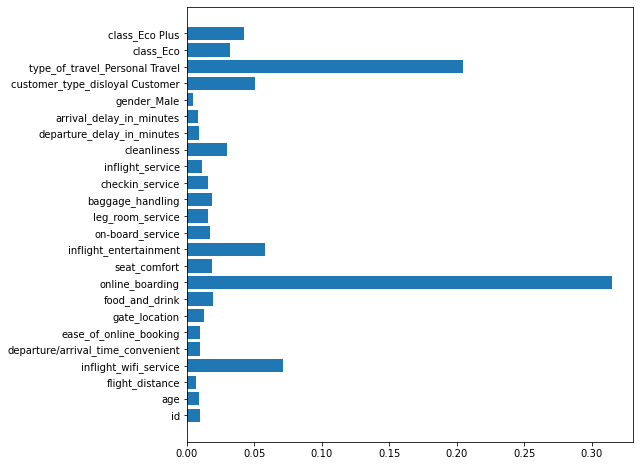

In [89]:
# 변수 중요도 시각화
plt.figure(figsize=(8,8))
plt.barh(y = list(x), width = model.best_estimator_.feature_importances_)

